In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import os
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from PIL import Image
from torch.cuda.amp import autocast, GradScaler

In [2]:
train_path = '/home/venk/Downloads/Image_Dataset/seg_train/seg_train/'
val_path =  '/home/venk/Downloads/Image_Dataset/seg_test/seg_test/'
test_path = '/home/venk/Downloads/Image_Dataset/seg_pred/seg_pred/' 

class ImageDataset(Dataset):
    def __init__(self, root_dir, transform = None):
        self.root_dir = root_dir
        self.transform = transform
        self.find_labels, self.find_class_idx = self.find_labels(root_dir)
        self.samples = self.make_dataset(root_dir)

    def find_labels(self, dir):
        classes = [d.name for d in os.scandir(dir) if d.is_dir()]
        classes.sort()
        class_idx = {class_name: i for i, class_name in enumerate(classes)}
        print(classes, class_idx)
        return classes, class_idx
    
    def make_dataset(self, dir):
        images = []
        for target_class in self.find_labels:
            class_dir = os.path.join(dir, target_class)
            for root, _, fnames in os.walk(class_dir):
                for fname in fnames:
                    path = os.path.join(root, fname)
                    item = (path, self.find_class_idx[target_class])
                    images.append(item)
        return images
    
    def one_hot_encode(self, label):
        one_hot_label = torch.zeros(len(self.find_labels))
        one_hot_label[label] = 1
        return one_hot_label
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, target = self.samples[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        target = self.one_hot_encode(target)

        return image, target
    

transform = T.Compose([
    T.Resize((150, 150)),
    T.ToTensor(),
    ])

train_set = ImageDataset(train_path, transform=transform)
train_loader = DataLoader(train_set, batch_size=1, shuffle=True)

val_set = ImageDataset(val_path, transform=transform)
val_loader = DataLoader(val_set, batch_size=1, shuffle = True)

test_set = ImageDataset(test_path, transform=transform)
test_loader = DataLoader(test_set, batch_size=1)



['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'] {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'] {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
[] {}


torch.Size([1, 3, 150, 150]) tensor([[1., 0., 0., 0., 0., 0.]])


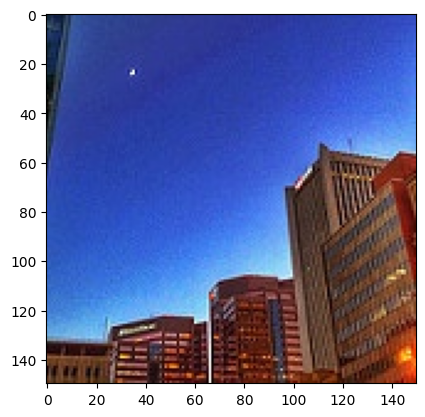

torch.Size([1, 3, 150, 150]) tensor([[0., 0., 0., 0., 0., 1.]])


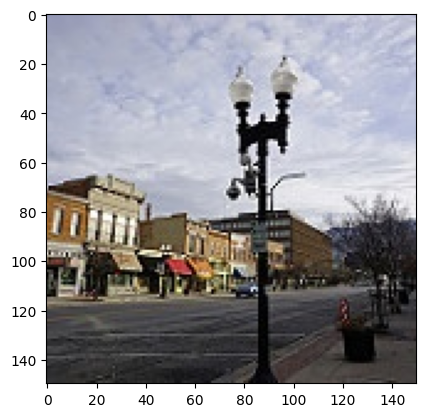

In [3]:
for k, i in enumerate(train_loader):
        if k < 2:
                img, label = i
                print(img.shape, label)
                for k2, j in enumerate(range(img.shape[0])):
                        if k2 < 2:
                                img_show = img[j].permute(1,2,0).cpu().detach().numpy()
                                plt.imshow(img_show)
                                plt.show() 
                        else: break
        else: break



In [4]:
class vgg(nn.Module):
    def __init__(self):
        super().__init__() #calling the constructor of the parent class (this case nn.Module)
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64,kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64,64,kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64,128,kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(128,128,kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2)
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(128,256,kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.layer6 = nn.Sequential(
            nn.Conv2d(256,256,kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.layer7 = nn.Sequential(
            nn.Conv2d(256,256,kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2)
        )
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.fc0 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(9*9*512,4096),
            nn.ReLU()
        )
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096,4096),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(4096,6),
            nn.Softmax(dim = 1)
        )
        self.flatten = nn.Flatten()

    def forward(self, x):
        print(x.shape)
        out = self.layer1(x)
        print(out.shape)
        out = self.layer2(out)
        print(out.shape)
        out = self.layer3(out)
        print(out.shape)
        out = self.layer4(out)
        print(out.shape)
        out = self.layer5(out)
        print(out.shape)
        out = self.layer6(out)
        print(out.shape)
        out = self.layer7(out)
        print(out.shape)
        out = self.layer8(out)
        print(out.shape)
        out = self.layer9(out)
        print(out.shape)
        out = self.layer10(out)
        print(out.shape)
        out = self.layer11(out)
        print(out.shape)
        out = self.layer12(out)
        print(out.shape)
        out = self.layer13(out)
        print(out.shape)
        out = self.flatten(out)
        print(out.shape)
        out = out.view(out.size(0), -1)
        print(out.shape)
        out = self.fc0(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [5]:
num_classes = 6
num_epochs = 20
batch_size = 16
learning_rate = 0.005
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = vgg().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.005)

cuda


In [ ]:
scaler = GradScaler()
accumulation_steps = 2
total_step = len(train_loader)

for epochs in range(num_epochs):
    running_loss = 0.0
    for k, data in enumerate(train_loader):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        with autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)

        loss = loss / accumulation_steps
        scaler.scale(loss).backward()

        if (k + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()

        running_loss += loss.item()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epochs + 1, num_epochs, running_loss / total_step))
    
    with torch.no_grad():
        total = 0
        correct = 0
        for k, data in enumerate(val_loader):
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            with autocast():
                outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
        print('Accuracy of the network on the {} validation images: {} %'.format(5000, 100 * correct / total)) 
